<a href="https://colab.research.google.com/github/mauriziobrt/schaeffer-dataset/blob/main/riffusion_generation_schaeffer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generation

In [ ]:
#@title Install dependencies
!pip install diffusers accelerate

In [ ]:
#@title Install Converter
!git clone https://github.com/mauriziobrt/riffusion_fix_image_audio.git
%pip install argh audiosegment

In [8]:
#@title Move riffusion outside of folder else conversion won't work
!mv "/content/riffusion_fix_image_audio/riffusion/" "/content/riffusion/"

In [9]:
#@title Import libraries
import pydub
import importlib
from riffusion.spectrogram_params import SpectrogramParams
from riffusion.spectrogram_converter import SpectrogramConverter
from riffusion.spectrogram_image_converter import SpectrogramImageConverter

In [10]:
#@title Instantiate converters
param = SpectrogramParams()
spec_conv = SpectrogramConverter(params = param)
spec_img_conv = SpectrogramImageConverter(params= param)
SpectrogramConverter(params= param)

In [ ]:
#@title Load pipeline
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1").to("cuda")
pipeline.load_lora_weights("mrzbrt/schaeffer-lora", weight_name="checkpoint-40000/pytorch_lora_weights.safetensors")
#image = pipeline("A pulsar synthesis articulated sound that starts with voice shimmering and ends with a granular synth, distorted").images[0]

Example captions:
- "A pulsar synthesis articulated sound that starts with voice shimmering and ends with a granular synth, distorted"

In [130]:
#@title Parameters for the generation sound objects
images_nr = 8 # @param {type:"integer"}
prompt = "This sound object is a dynamic textural sound. It is a sound of synthetic origin and develops in the high range" # @param {type:"string"}

Since the dataset is quite small, it is suggested to use terms and caption within the dataset as starting points. You can find the dataset at this link [schaeffer-dataset](https://huggingface.co/datasets/dbschaeffer/schaeffer_thesis_corrected/viewer)

In [131]:
#@title Create 4 random seeds
import random
seeds = []
for i in range(images_nr):
  seeds.append(random.randint(0, 4294967295))

print(seeds)

[380627590, 3769484363, 3859197976, 552048810, 551877365, 3492789043, 18831562, 3597595249]


In [132]:
#@title Load generator
import torch

generator = [torch.Generator(device="cuda").manual_seed(i) for i in seeds]

In [134]:
#@title Start Generation
images = pipeline(prompt, generator=generator, num_images_per_prompt=images_nr).images
audios = []
for element in images:
  audios.append(spec_img_conv.audio_from_spectrogram_image(image = element))

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [148]:
#@title Now choose which index sounds better for you, if they are all bad re-generate new ones.
index = 1 #@param {type: "integer"}
audios[index]

#@markdown Keep the index where you want it, it will be reused fo newer generations!

In [160]:
seeds[index]

3769484363

In [152]:
#@title Fix prompt and decide from which seed to start
#prompt = [prompt + t for t in [", articulated", ", complex", ", slow decay", ", marked onset"]]
generator = [torch.Generator(device="cuda").manual_seed(seeds[index]) for i in range(4)]

In [153]:
#@title Generate an example similar to the index you chose
images = pipeline(prompt, generator=generator).images
audios = []
for element in images:
  audios.append(spec_img_conv.audio_from_spectrogram_image(image = element))

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


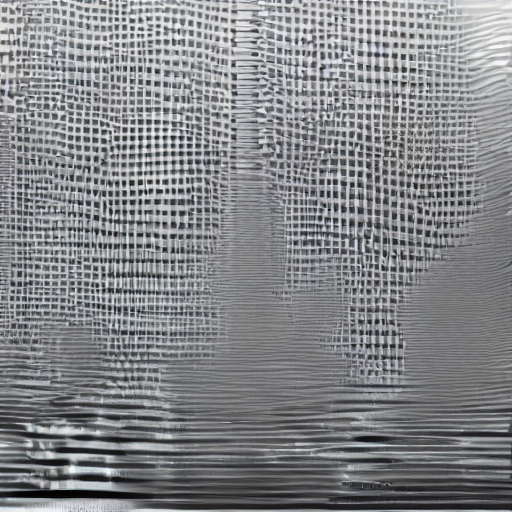

In [162]:
images[1]

In [161]:
#@title Play the sounds you just generated
index_new = 1 #@param {type: "integer"}
audios[index_new]